In [144]:
import tensorflow as tf

lenet_model = tf.keras.models.load_model('/content/lenet5_fp32_mnist.keras')

In [145]:
lenet_model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 10)             │        61,706 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,120 (723.13 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,414 (482.09 KB)

In [107]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to the spider plots folder
plots_path = '/content/drive/MyDrive/Si-Ware/moisture Si-Ware dataset/Spider plots/spider_plots'
vector_path = '/content/drive/MyDrive/Si-Ware/moisture Si-Ware dataset/All predictors/DL_FreshCS_train_Multiple_Refs.csv'

# List the files in the folder
if os.path.exists(plots_path):
    image_files = [f for f in os.listdir(plots_path) if os.path.isfile(os.path.join(plots_path, f))]
    print(f"Files found in '{plots_path}':")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files found in '/content/drive/MyDrive/Si-Ware/moisture Si-Ware dataset/Spider plots/spider_plots':


In [108]:
import pandas as pd

df = pd.read_csv(vector_path)
df = df.groupby('Sample ID', as_index=False).mean()
df = df[['Moi', 'NDF' , 'Starch']]

In [109]:
df.shape

(784, 3)

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split

y_train , y_test = train_test_split(df, test_size=0.3, random_state=42)
# Y_train , Y_test = train_test_split(, test_size=0.2, random_state=42)
print(f'Num of training target (moi ndf and starch): {y_train.shape[0]}')
print(f'Num of testing target: {y_test.shape[0]}')

Num of training target (moi ndf and starch): 548
Num of testing target: 236


In [112]:
from sklearn.model_selection import train_test_split

# Assuming 'image_files' contains the list of image filenames from a previous cell (e.g., fc89fec6)
if 'image_files' in locals() and image_files:
    train_images, test_images = train_test_split(image_files, test_size=0.3, random_state=42)

    print(f"Number of training images : {len(train_images)}")
    print(f"Number of testing images : {len(test_images)}")
else:
    print("Image file list not found. Please ensure the cell listing image files has been run.")

Number of training images : 548
Number of testing images : 236


In [113]:
import os
from PIL import Image
import numpy as np

# Define the target size
target_size = (32, 32)

# Function to load and resize images
def load_and_preprocess_images(image_list, base_folder, target_size):
    images = []
    for image_file in image_list:
        img_path = os.path.join(base_folder, image_file)
        try:
            #img = Image.open(img_path).convert('L') # Convert to grayscale if not already
            img = Image.open(img_path)
            img = img.resize(target_size)
            images.append(np.array(img))
        except Exception as e:
            print(f"Error loading or processing image {image_file}: {e}")
    return np.array(images)

# Specify the base folder for the images
image_base_folder = '/content/drive/MyDrive/Si-Ware/moisture Si-Ware dataset/Spider plots/spider_plots'

# Load and preprocess the training and testing images
# These calls should be outside the function definition
if 'train_image_files' in locals() and 'test_image_files' in locals():
    train_images = load_and_preprocess_images(train_images, image_base_folder, target_size)
    test_images = load_and_preprocess_images(test_images, image_base_folder, target_size)

    print(f"Shape of training images array: {train_images.shape}")
    print(f"Shape of testing images array: {test_images.shape}")
else:
    print("Training or testing image file lists not found. Please run the previous cell to split the images.")

Shape of training images array: (548, 32, 32, 4)
Shape of testing images array: (236, 32, 32, 4)


In [114]:
# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

print(f"Shape of training images array after reshaping and scaling: {train_images.shape}")
print(f"Shape of testing images array after reshaping and scaling: {test_images.shape}")

Shape of training images array after reshaping and scaling: (548, 32, 32, 4)
Shape of testing images array after reshaping and scaling: (236, 32, 32, 4)


In [101]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

print("Original model summary:")
model.summary()

# Input طبقة الموديل الأصلي
input_layer = model.input

# آخر طبقة قبل الـ Dense
x = model.layers[-2].output

# Flatten بشكل ديناميكي
x = Flatten()(x)

# Dense للـ regression
output_layer_regression = Dense(3, activation='linear', name='regression_output')(x)

# موديل جديد
model_regression = Model(inputs=input_layer, outputs=output_layer_regression)
model_regression.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("\nModified model summary for regression:")
model_regression.summary()

Original model summary:


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 10)             │        61,706 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,120 (723.13 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,414 (482.09 KB)


Modified model summary for regression:


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ regression_output (Dense)       │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,075 (12.01 KB)

 Trainable params: 3,075 (12.01 KB)

 Non-trainable params: 0 (0.00 B)

In [136]:
def r2_metric(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res/(ss_tot + tf.keras.backend.epsilon())

In [133]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
# --- Model Builder Function ---
def build_model():
    inputs = layers.Input(shape=(32, 32, 4))

    # Convolutional layers (LeNet-style)
    x = layers.Conv2D(6, (5,5), activation='relu', padding='same')(inputs)
    x = layers.AveragePooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(16, (5,5), activation='relu')(x)
    x = layers.AveragePooling2D(pool_size=(2, 2))(x)
    # Flatten (or GlobalAveragePooling2D)
    x = layers.Flatten()(x)
    # Fully connected layers
    x = layers.Dense(120, activation='relu')(x)
    x = layers.Dense(84, activation='relu')(x)

    # Regression output (3 targets)
    outputs = layers.Dense(3, activation='linear', name="regression_output")(x)

    # Build and compile model
    model = models.Model(inputs=inputs, outputs=outputs)
    optimizer = optimizers.Adam(learning_rate=0.001)

    model.compile(optimizer='adam', loss='mse', metrics=[r2_metric])

    return model

In [138]:
history = model_regression.fit(
    train_images, y_train,       # input data + targets
    #validation_data=(X_val, y_val),  # optional
    epochs=50,
    batch_size=32)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 56.0239 - mae: 5.5281 - r2_score: 0.7889
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 58.3209 - mae: 5.5952 - r2_score: 0.7871
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 61.5238 - mae: 5.7911 - r2_score: 0.7703
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 59.5610 - mae: 5.6501 - r2_score: 0.7779
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 56.9230 - mae: 5.5042 - r2_score: 0.7808
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 56.8237 - mae: 5.5829 - r2_score: 0.7900
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 62.0606 - mae: 5.8188 - r2_score: 0.7781
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 55.5693 - mae: 5.4024 - r2_score: 0.7950
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 66.2247 - mae: 6.0489 - r2_score: 0.7674
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 59.7098 - mae: 5.5631 - r2_score: 0.7846

In [142]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as sk_r2, mean_squared_error # Import mean_squared_error for RMSE
import numpy as np
import tensorflow as tf # Import tensorflow to handle tf dtypes if necessary

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2_scores = []
cv_rmse_scores = []
cv_bias_scores = []
# Lists to store scores per target per fold
cv_r2_scores_per_target = {col: [] for col in y_train.columns}
cv_rmse_scores_per_target = {col: [] for col in y_train.columns}
cv_bias_scores_per_target = {col: [] for col in y_train.columns}


# Assuming train_images contains the training image features for cross-validation
# Assuming y_train contains the training spectral targets for cross-validation and are aligned with train_images
X_cv = train_images # Features for CV
y_cv = y_train.values # Targets for CV (convert DataFrame to NumPy array)


for train_idx, val_idx in kf.split(X_cv):
    X_tr, X_val = X_cv[train_idx], X_cv[val_idx]
    y_tr, y_val = y_cv[train_idx], y_cv[val_idx]

    # Build the model inside the loop to get a fresh model for each fold
    # Assuming build_model() function exists and is appropriate for the data shape
    # build_model() needs to output 3 units for Moi, NDF, Starch regression
    # Based on cell zHCTyDFq333_ and 6Jp96YmEXso2, let's assume build_model creates
    # a LeNet-like model with 3 regression outputs. If zHCTyDFq333_ is the current build_model,
    # it needs to be updated to output 3 units instead of 1.

    # Let's use the model modification approach from cell 6Jp96YmEXso2 directly in a function
    def build_regression_model():
        # Assuming 'model' (the original LeNet-5) is available globally
        input_layer = model.input
        x = model.layers[-2].output # Output of layer before the last classification layer
        x = tf.keras.layers.Flatten()(x) # Flatten before regression
        output_layer_regression = tf.keras.layers.Dense(3, activation='linear', name='regression_output')(x)
        regression_model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer_regression)
        # Use the custom r2_metric function here
        regression_model.compile(optimizer='adam', loss='mse', metrics=['mae', r2_metric])
        return regression_model

    current_model = build_regression_model() # Build a fresh model for the fold


    # Train the model
    # Ensure y_tr is in the correct format for training (NumPy array)
    current_model.fit(X_tr, y_tr, epochs=10, batch_size=32, verbose=0)

    # Make predictions on the validation set
    y_val_pred = current_model.predict(X_val)

    # Convert predictions and true values to standard NumPy arrays with float dtype
    # to ensure compatibility with scikit-learn metrics
    y_val_np = np.asarray(y_val).astype(np.float32)
    y_val_pred_np = np.asarray(y_val_pred).astype(np.float32)


    # Calculate R² score using scikit-learn's r2_score (uniform average)
    try:
        fold_r2_score = sk_r2(y_val_np, y_val_pred_np, multioutput='uniform_average')
        cv_r2_scores.append(fold_r2_score)
    except ValueError as e:
        print(f"Error calculating R2 (uniform average) for a fold: {e}")


    # Calculate R², RMSE, Bias for each target
    for i, col in enumerate(y_train.columns):
        try:
            # R2 per target
            r2_target = sk_r2(y_val_np[:, i], y_val_pred_np[:, i])
            cv_r2_scores_per_target[col].append(r2_target)

            # RMSE per target
            rmse_target = np.sqrt(mean_squared_error(y_val_np[:, i], y_val_pred_np[:, i]))
            cv_rmse_scores_per_target[col].append(rmse_target)

            # Bias per target
            bias_target = np.mean(y_val_pred_np[:, i]) - np.mean(y_val_np[:, i])
            cv_bias_scores_per_target[col].append(bias_target)

        except ValueError as e:
             print(f"Error calculating metrics for target {col} in a fold: {e}")


print("Cross-validation Results (Uniform Average R²):")
print("CV R² scores (uniform average):", cv_r2_scores)
print("Mean CV R² (uniform average):", np.mean(cv_r2_scores))
print("Std Dev CV R² (uniform average):", np.std(cv_r2_scores))

print("\nCross-validation Results (Per Target):")
for col in y_train.columns:
    print(f"  {col} - R2: Mean = {np.mean(cv_r2_scores_per_target[col]):.4f}, Std = {np.std(cv_r2_scores_per_target[col]):.4f}")
    print(f"  {col} - RMSE: Mean = {np.mean(cv_rmse_scores_per_target[col]):.4f}, Std = {np.std(cv_rmse_scores_per_target[col]):.4f}")
    print(f"  {col} - Bias: Mean = {np.mean(cv_bias_scores_per_target[col]):.4f}, Std = {np.std(cv_bias_scores_per_target[col]):.4f}")

# The build_model function in cell zHCTyDFq333_ currently builds a model with 1 output unit.
# It needs to be updated to 3 output units if you are predicting Moi, NDF, Starch.
# For now, we are using the model modification logic from cell 6Jp96YmEXso2 within
# a local function build_regression_model() for the cross-validation loop.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Cross-validation Results (Uniform Average R²):
CV R² scores (uniform average): [0.05091583728790283, -0.053028445690870285, 0.039382338523864746, 0.05298016592860222, 0.054499369114637375]
Mean CV R² (uniform average): 0.028949853032827377
Std Dev CV R² (uniform average): 0.041332835347530295

Cross-validation Results (Per Target):
  Moi - R2: Mean = 0.1428, Std = 0.0524
  Moi - RMSE: Mean = 5.6992, Std = 0.2820
  Moi - Bias: Mean = -0.3532, Std = 0.6943
  NDF - R2: Mean = -0.0262, Std = 0.0494
  NDF - RMSE: Mean = 6.3982, Std = 0.5937
  NDF - Bias: Mean = -0.4021, Std = 0.9305
  Starch - R2: Mean = -0.0297, Std = 0.0277
  Starch - RMSE: Mean = 10.0241, Std = 0.6028
  Starch - Bias: Mean = 0.2698, Std = 1.3766


# Now R2 Bias and rmse test scores

In [149]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assume test_images contains the testing image features
# Assume y_test contains the spectral targets for the test set and is aligned with test_images
# Renaming y_test to Y_test_aligned for clarity as it represents the target values
Y_test_aligned = y_test

# Ensure test_images and Y_test_aligned have compatible shapes and types if necessary
# test_images is already a NumPy array from previous steps
# Y_test_aligned (originally y_test) is a pandas DataFrame

# Make predictions on the testing images using the modified regression model
print("Making predictions on testing images...")
y_pred_test = model_regression.predict(test_images)

# Calculate R2, RMSE, and Bias scores for each target
print("\nTesting Results:")

# Ensure the column names from the original y_test DataFrame are used for clarity
# Assuming the columns in Y_test_aligned (originally y_test) correspond to the spectral targets
target_names = Y_test_aligned.columns.tolist() # Use Y_test_aligned directly to get column names

if y_pred_test.shape[1] == len(target_names):
    for i, target_name in enumerate(target_names):
        # Calculate R2 score for the current target
        r2 = r2_score(Y_test_aligned.iloc[:, i], y_pred_test[:, i])

        # Calculate RMSE score for the current target
        rmse = np.sqrt(mean_squared_error(Y_test_aligned.iloc[:, i], y_pred_test[:, i]))

        # Calculate Bias score for the current target
        bias = np.mean(y_pred_test[:, i]) - np.mean(Y_test_aligned.iloc[:, i])


        print(f"  {target_name} - R2: {r2:.4f}")
        print(f"  {target_name} - RMSE: {rmse:.4f}")
        print(f"  {target_name} - Bias: {bias:.4f}")

else:
    print("Mismatch between the number of model outputs and the number of target variables in Y_test_aligned.")
    print(f"Model outputs shape: {y_pred_test.shape}")
    print(f"Y_test_aligned shape: {Y_test_aligned.shape}")

Making predictions on testing images...
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step

Testing Results:
  Moi - R2: 0.1149
  Moi - RMSE: 6.5808
  Moi - Bias: 4.2849
  NDF - R2: 0.0256
  NDF - RMSE: 6.0590
  NDF - Bias: 0.0351
  Starch - R2: -0.0009
  Starch - RMSE: 10.2659
  Starch - Bias: 0.7649


In [150]:
model_regression.summary()

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 6)      │           606 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 16, 16, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 6, 6, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 120)            │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ regression_output (Dense)       │ (None, 3)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 248,045 (968.93 KB)

 Trainable params: 82,681 (322.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 165,364 (645.96 KB)

Generating scatter plots of Predicted vs Actual values for the test set...


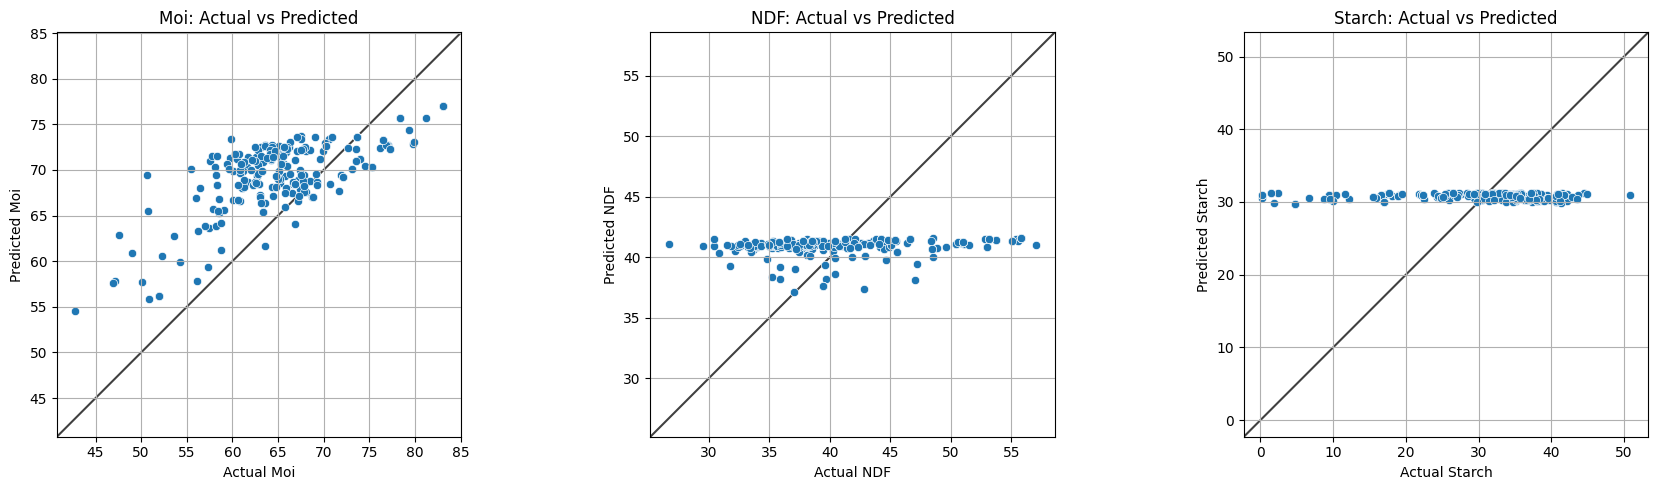

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas for DataFrame handling if Y_test_aligned is a DataFrame

# Assuming y_pred_test contains predictions from the model (NumPy array)
# Assuming Y_test_aligned contains the actual test targets (pandas DataFrame)

# Ensure Y_test_aligned is treated as a DataFrame for column access
if not isinstance(Y_test_aligned, pd.DataFrame):
    # Attempt to convert to DataFrame, assuming column names are available from y_test
    # This relies on y_test still being available and having the correct columns
    if 'y_test' in locals() and isinstance(y_test, pd.DataFrame):
         Y_test_aligned = pd.DataFrame(Y_test_aligned, columns=y_test.columns)
         print("Converted Y_test_aligned to DataFrame using y_test columns.")
    else:
         print("Could not convert Y_test_aligned to DataFrame. Target names might be incorrect.")
         # Fallback: use generic names if conversion fails
         target_names = [f'Target {i+1}' for i in range(y_pred_test.shape[1])]
         Y_test_aligned = pd.DataFrame(Y_test_aligned, columns=target_names)
else:
    target_names = Y_test_aligned.columns.tolist()


print("Generating scatter plots of Predicted vs Actual values for the test set...")

if y_pred_test.shape[1] == len(target_names):
    num_targets = y_pred_test.shape[1]
    fig, axes = plt.subplots(1, num_targets, figsize=(6 * num_targets, 5)) # Create subplots

    if num_targets == 1: # Handle case with only one target
        axes = [axes]

    for i in range(num_targets):
        ax = axes[i]
        target_name = target_names[i]

        # Create a DataFrame for plotting
        plot_df = pd.DataFrame({
            'Actual': Y_test_aligned.iloc[:, i],
            'Predicted': y_pred_test[:, i]
        })

        # Scatter plot
        sns.scatterplot(data=plot_df, x='Actual', y='Predicted', ax=ax)
        ax.set_title(f'{target_name}: Actual vs Predicted')
        ax.set_xlabel(f'Actual {target_name}')
        ax.set_ylabel(f'Predicted {target_name}')
        ax.grid(True)

        # Add a diagonal line for perfect prediction
        lims = [
            np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
        ]
        ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
        ax.set_aspect('equal', adjustable='box')
        ax.set_xlim(lims)
        ax.set_ylim(lims)


    plt.tight_layout()
    plt.show()

else:
    print("Mismatch between the number of model outputs and the number of target variables for plotting.")
    print(f"Model outputs shape: {y_pred_test.shape}")
    print(f"Y_test_aligned shape: {Y_test_aligned.shape}")